# eICU Collaborative Research Database

# Notebook 3: Plot timeseries data for a single patient stay

The aim of this notebook is to create a series of plots using timeseries data available for a single patient stay, using the following tables:

- `patient`
- `vitalperiodic`
- `vitalaperiodic`
- `lab`

Before starting, you will need to copy the eicu demo database file ('eicu_demo.sqlite3') to the `data` directory.

Documentation on the eICU Collaborative Research Database can be found at: http://eicu-crd.mit.edu/.

## 1. Getting set up

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

In [2]:
# Plot settings
%matplotlib inline
plt.style.use('ggplot')
fontsize = 20 # size for x and y ticks
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams.update({'font.size': fontsize})

In [3]:
# Connect to the database
fn = os.path.join('data','eicu_demo.sqlite3')
con = sqlite3.connect(fn)
cur = con.cursor()

## 2. Display a list of tables

In [4]:
query = \
"""
SELECT type, name
FROM sqlite_master 
WHERE type='table'
ORDER BY name;
"""

list_of_tables = pd.read_sql_query(query,con)

In [5]:
list_of_tables

,type,name
0,table,admissiondrug
1,table,admissiondx
2,table,apacheapsvar
3,table,apachepatientresult
4,table,apachepredvar
5,table,careplancareprovider
6,table,careplaneol
7,table,careplangeneral
8,table,careplangoal
9,table,careplaninfectiousdisease


## 3. Selecting a single patient stay 

### 3.1. The `patient` table

The `patient` table includes general information about the patient admissions (for example, demographics, admission and discharge details). See: http://eicu-crd.mit.edu/eicutables/patient/

In [6]:
# select a single ICU stay
patientunitstayid = 141296

In [7]:
# query to load data from the patient table
query = \
"""
SELECT *
FROM patient
WHERE patientunitstayid = {}
""".format(patientunitstayid)

print(query)


SELECT *
FROM patient
WHERE patientunitstayid = 141296



In [8]:
# run the query and assign the output to a variable
unitstay = pd.read_sql_query(query,con)

In [9]:
# display the first few rows of the dataframe
unitstay.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmityear,...,unitstaytype,admissionweight,dischargeweight,unitdischargeyear,unitdischargetime24,unitdischargetime,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141296,129026,Male,63,Caucasian,73,85,"Hypovolemia (including dehydration, Do not inc...",162.6,2014,...,admit,None,76.8,2014,17:00:00,evening,2828,Floor,Alive,002-30269


### 3.2. The `vitalperiodic` table
 
The `vitalperiodic` table comprises data that is consistently interfaced from bedside vital signs monitors into eCareManager. Data are generally interfaced as 1 minute averages, and archived into the `vitalperiodic` table as 5 minute median values. For more detail, see: http://eicu-crd.mit.edu/eicutables/vitalPeriodic/

In [10]:
# query to load data from the patient table
query = \
"""
SELECT *
FROM vitalperiodic
WHERE patientunitstayid = {}
""".format(patientunitstayid)

print(query)


SELECT *
FROM vitalperiodic
WHERE patientunitstayid = 141296



In [11]:
# run the query and assign the output to a variable
vitalperiodic = pd.read_sql_query(query,con)

In [14]:
# display the first few rows of the dataframe
vitalperiodic.head()

,patientunitstayid,vitalperiodicid,observationyear,observationtime24,observationtime,observationoffset,temperature,sao2,heartrate,respiration,...,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
0,141296,1933588,2014,12:40:00,noon,2568,None,98.0,98.0,21.0,...,None,None,None,None,None,None,None,None,None,None
1,141296,1960296,2014,19:45:00,night,1553,None,97.0,98.0,18.0,...,None,None,None,None,None,None,None,None,None,None
2,141296,1979222,2014,07:35:00,midday,823,None,95.0,112.0,32.0,...,None,None,None,None,None,None,None,None,None,None
3,141296,1959122,2014,20:30:00,night,1598,None,98.0,100.0,22.0,...,None,None,None,None,None,None,None,None,None,None
4,141296,1953374,2014,00:10:00,midnight,1818,None,97.0,110.0,20.0,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# display a full list of columns
vitalperiodic.columns

In [15]:
# sort the values by the observationoffset (time in minutes from ICU admission)
vitalperiodic = vitalperiodic.sort_values(by='observationoffset')
vitalperiodic.head()

,patientunitstayid,vitalperiodicid,observationyear,observationtime24,observationtime,observationoffset,temperature,sao2,heartrate,respiration,...,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
25,141296,2001591,2014,18:05:00,night,13,None,100.0,124.0,36.0,...,None,None,None,None,None,None,None,None,None,None
37,141296,2001440,2014,18:10:00,night,18,None,100.0,122.0,29.0,...,None,None,None,None,None,None,None,None,None,None
61,141296,2001288,2014,18:15:00,night,23,None,100.0,124.0,28.0,...,None,None,None,None,None,None,None,None,None,None
245,141296,2001137,2014,18:20:00,night,28,None,100.0,120.0,23.0,...,None,None,None,None,None,None,None,None,None,None
211,141296,2000987,2014,18:25:00,night,33,None,100.0,124.0,23.0,...,None,None,None,None,None,None,None,None,None,None


In [16]:
# subselect the variable columns
columns = ['observationoffset','temperature','sao2','heartrate','respiration',
          'cvp','etco2','systemicsystolic','systemicdiastolic','systemicmean',
          'pasystolic','padiastolic','pamean','st1','st2','st3','icp']

vitalperiodic = vitalperiodic[columns].set_index('observationoffset')
vitalperiodic.head()

,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
observationoffset,,,,,,,,,,,,,,,,
13,None,100.0,124.0,36.0,None,None,None,None,None,None,None,None,None,None,None,None
18,None,100.0,122.0,29.0,None,None,None,None,None,None,None,None,None,None,None,None
23,None,100.0,124.0,28.0,None,None,None,None,None,None,None,None,None,None,None,None
28,None,100.0,120.0,23.0,None,None,None,None,None,None,None,None,None,None,None,None
33,None,100.0,124.0,23.0,None,None,None,None,None,None,None,None,None,None,None,None


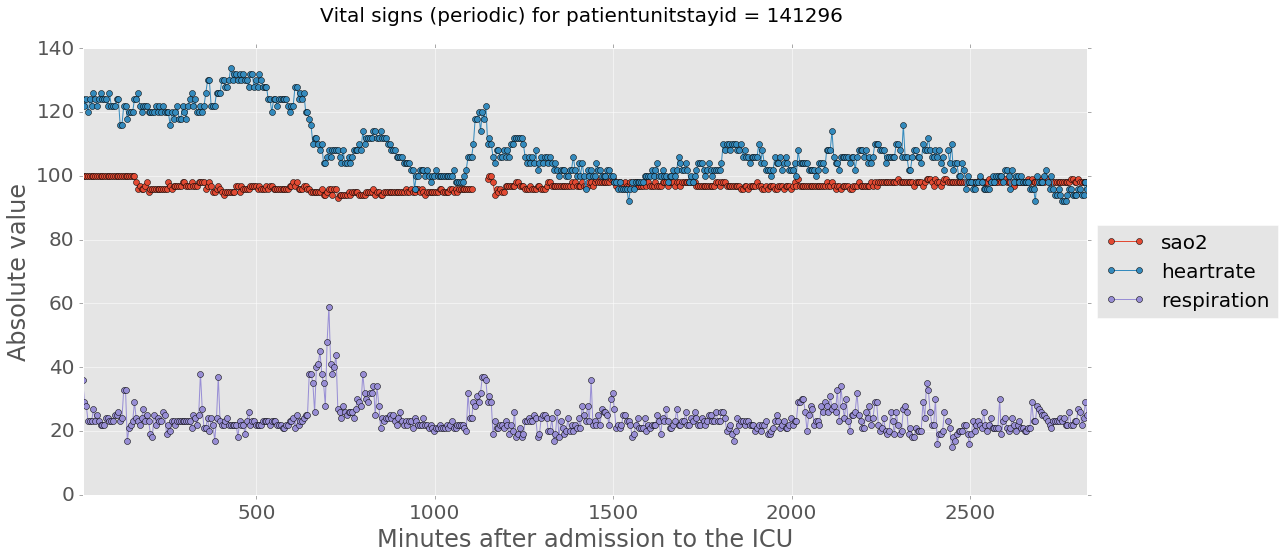

In [17]:
# plot the data
figsize = (18,8)
title = 'Vital signs (periodic) for patientunitstayid = {} \n'.format(patientunitstayid)
ax = vitalperiodic.plot(title=title, figsize=figsize, fontsize=fontsize,
                       marker='o')

ax.title.set_size(fontsize)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Minutes after admission to the ICU")
ax.set_ylabel("Absolute value")

### Questions

- Which variables are available for this patient?
- What is the peak heart rate during the period?

### 3.3. The `vitalaperiodic` table

The `vitalAperiodic` table provides invasive vital sign data that is recorded at irregular intervals. See: http://eicu-crd.mit.edu/eicutables/vitalAperiodic/

In [18]:
# query to load data from the patient table
query = \
"""
SELECT *
FROM vitalaperiodic
WHERE patientunitstayid = {}
""".format(patientunitstayid)

print(query)


SELECT *
FROM vitalaperiodic
WHERE patientunitstayid = 141296



In [19]:
# run the query and assign the output to a variable
vitalaperiodic = pd.read_sql_query(query,con)

In [20]:
# display the first few rows of the dataframe
vitalaperiodic.head()

,patientunitstayid,vitalaperiodicid,observationyear,observationtime24,observationtime,observationoffset,noninvasivesystolic,noninvasivediastolic,noninvasivemean,paop,cardiacoutput,cardiacinput,svr,svri,pvr,pvri
0,141296,1507295,2014,13:56:06,noon,1204,160.0,91.0,122.0,None,None,None,None,None,None,None
1,141296,1507277,2014,22:26:00,midnight,274,152.0,80.0,112.0,None,None,None,None,None,None,None
2,141296,1507298,2014,16:56:08,evening,1384,108.0,71.0,88.0,None,None,None,None,None,None,None
3,141296,1507270,2014,18:55:56,night,63,163.0,78.0,97.0,None,None,None,None,None,None,None
4,141296,1507302,2014,20:56:09,night,1624,151.0,78.0,114.0,None,None,None,None,None,None,None


In [21]:
vitalaperiodic.columns

Index([u'patientunitstayid', u'vitalaperiodicid', u'observationyear',
       u'observationtime24', u'observationtime', u'observationoffset',
       u'noninvasivesystolic', u'noninvasivediastolic', u'noninvasivemean',
       u'paop', u'cardiacoutput', u'cardiacinput', u'svr', u'svri', u'pvr',
       u'pvri'],
      dtype='object')

In [22]:
# sort the values by the observationoffset (time in minutes from ICU admission)
vitalaperiodic = vitalaperiodic.sort_values(by='observationoffset')
vitalaperiodic.head()

,patientunitstayid,vitalaperiodicid,observationyear,observationtime24,observationtime,observationoffset,noninvasivesystolic,noninvasivediastolic,noninvasivemean,paop,cardiacoutput,cardiacinput,svr,svri,pvr,pvri
27,141296,1507268,2014,18:07:24,night,15,142.0,101.0,115.0,None,None,None,None,None,None,None
24,141296,1507269,2014,18:22:23,night,30,157.0,75.0,125.0,None,None,None,None,None,None,None
3,141296,1507270,2014,18:55:56,night,63,163.0,78.0,97.0,None,None,None,None,None,None,None
21,141296,1507271,2014,19:25:57,night,93,160.0,87.0,107.0,None,None,None,None,None,None,None
40,141296,1507272,2014,19:55:57,night,123,150.0,81.0,112.0,None,None,None,None,None,None,None


In [23]:
# subselect the variable columns
columns = ['observationoffset','noninvasivesystolic','noninvasivediastolic',
          'noninvasivemean','paop','cardiacoutput','cardiacinput','svr',
          'svri','pvr','pvri']

vitalaperiodic = vitalaperiodic[columns].set_index('observationoffset')
vitalaperiodic.head()

,noninvasivesystolic,noninvasivediastolic,noninvasivemean,paop,cardiacoutput,cardiacinput,svr,svri,pvr,pvri
observationoffset,,,,,,,,,,
15,142.0,101.0,115.0,None,None,None,None,None,None,None
30,157.0,75.0,125.0,None,None,None,None,None,None,None
63,163.0,78.0,97.0,None,None,None,None,None,None,None
93,160.0,87.0,107.0,None,None,None,None,None,None,None
123,150.0,81.0,112.0,None,None,None,None,None,None,None


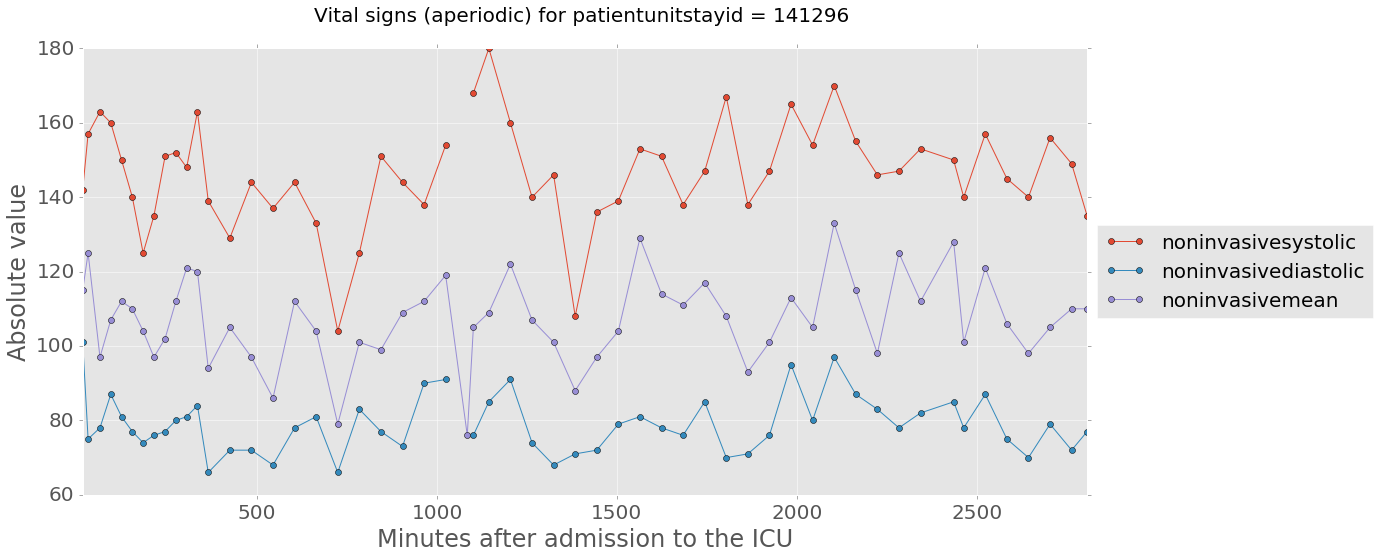

In [24]:
# plot the data
figsize = (18,8)
title = 'Vital signs (aperiodic) for patientunitstayid = {} \n'.format(patientunitstayid)
ax = vitalaperiodic.plot(title=title, figsize=figsize, fontsize=fontsize,
                        marker='o')

ax.title.set_size(fontsize)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Minutes after admission to the ICU")
ax.set_ylabel("Absolute value")

### Questions

- What do the non-invasive variables measure?
- How do you think the mean is calculated?


### 3.4. The `lab` table

In [25]:
# query to load data from the patient table
query = \
"""
SELECT *
FROM lab
WHERE patientunitstayid = {}
""".format(patientunitstayid)

print(query)


SELECT *
FROM lab
WHERE patientunitstayid = 141296



In [26]:
# run the query and assign the output to a variable
lab = pd.read_sql_query(query,con)

In [27]:
# display the first few rows of the dataframe
lab.head()

,patientunitstayid,labid,labresultyear,labresulttime24,labresulttime,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedyear,labresultrevisedtime24,labresultrevisedtime,labresultrevisedoffset
0,141296,49726053,2014,12:10:00,noon,-342,2,Tacrolimus-FK506,7.2,7.2,ng/mL,ng/mL,2014,17:12:00,evening,-40
1,141296,49726051,2014,10:40:00,noon,1008,2,Tacrolimus-FK506,8.2,8.2,ng/mL,ng/mL,2014,17:31:00,evening,1419
2,141296,46043498,2014,21:20:00,night,-1232,1,CPK,2018.0,2018,Units/L,Units/L,2014,22:13:00,midnight,-1179
3,141296,56145945,2014,11:25:00,noon,-1827,3,Hgb,9.3,9.3,g/dL,g/dL,2014,12:50:00,noon,-1742
4,141296,50351418,2014,12:10:00,noon,-342,3,Hgb,9.4,9.4,g/dL,g/dL,2014,14:11:00,evening,-221


In [28]:
# list columns in the table
lab.columns

Index([u'patientunitstayid', u'labid', u'labresultyear', u'labresulttime24',
       u'labresulttime', u'labresultoffset', u'labtypeid', u'labname',
       u'labresult', u'labresulttext', u'labmeasurenamesystem',
       u'labmeasurenameinterface', u'labresultrevisedyear',
       u'labresultrevisedtime24', u'labresultrevisedtime',
       u'labresultrevisedoffset'],
      dtype='object')

In [29]:
# sort the values by the offset time (time in minutes from ICU admission)
lab = lab.sort_values(by='labresultoffset')
lab.head()

,patientunitstayid,labid,labresultyear,labresulttime24,labresulttime,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedyear,labresultrevisedtime24,labresultrevisedtime,labresultrevisedoffset
95,141296,47645495,2014,11:25:00,noon,-1827,1,anion gap,17.0,17,,mmol/L,2014,12:19:00,noon,-1773
99,141296,47645499,2014,11:25:00,noon,-1827,1,glucose,86.0,86,mg/dL,mg/dL,2014,12:19:00,noon,-1773
21,141296,46021317,2014,11:25:00,noon,-1827,1,alkaline phos.,512.0,512,Units/L,Units/L,2014,16:45:00,evening,-1507
23,141296,56145942,2014,11:25:00,noon,-1827,3,Hct,29.5,29.5,%,%,2014,12:50:00,noon,-1742
25,141296,46021316,2014,11:25:00,noon,-1827,1,total bilirubin,0.6,0.6,mg/dL,mg/dL,2014,16:45:00,evening,-1507


In [30]:
# set the index to the offset time
lab = lab.set_index('labresultoffset')
lab.head()

,patientunitstayid,labid,labresultyear,labresulttime24,labresulttime,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedyear,labresultrevisedtime24,labresultrevisedtime,labresultrevisedoffset
labresultoffset,,,,,,,,,,,,,,,
-1827,141296,47645495,2014,11:25:00,noon,1,anion gap,17.0,17,,mmol/L,2014,12:19:00,noon,-1773
-1827,141296,47645499,2014,11:25:00,noon,1,glucose,86.0,86,mg/dL,mg/dL,2014,12:19:00,noon,-1773
-1827,141296,46021317,2014,11:25:00,noon,1,alkaline phos.,512.0,512,Units/L,Units/L,2014,16:45:00,evening,-1507
-1827,141296,56145942,2014,11:25:00,noon,3,Hct,29.5,29.5,%,%,2014,12:50:00,noon,-1742
-1827,141296,46021316,2014,11:25:00,noon,1,total bilirubin,0.6,0.6,mg/dL,mg/dL,2014,16:45:00,evening,-1507


In [31]:
# subselect the variable columns
columns = ['labname','labresult','labmeasurenamesystem']
lab = lab[columns]
lab.head()

,labname,labresult,labmeasurenamesystem
labresultoffset,,,
-1827,anion gap,17.0,
-1827,glucose,86.0,mg/dL
-1827,alkaline phos.,512.0,Units/L
-1827,Hct,29.5,%
-1827,total bilirubin,0.6,mg/dL


In [32]:
# list the distinct labnames
lab['labname'].unique()

array([u'anion gap', u'glucose', u'alkaline phos.', u'Hct',
       u'total bilirubin', u'-bands', u'albumin', u'MCV', u'AST (SGOT)',
       u'potassium', u'RDW', u'total protein', u'WBC x 1000',
       u'creatinine', u'-monos', u'platelets x 1000', u'-polys',
       u'calcium', u'MCH', u'bicarbonate', u'Tacrolimus-FK506', u'Hgb',
       u'PT', u'direct bilirubin', u'PT - INR', u'chloride', u'BUN',
       u'-lymphs', u'MCHC', u'sodium', u'ALT (SGPT)', u'RBC', u'CPK',
       u'bedside glucose', u'paCO2', u'HCO3', u'FiO2', u'Base Excess',
       u'pH', u'paO2', u'CRP', u'ESR'], dtype=object)

In [33]:
# pivot the lab table to put variables into columns
lab = lab.pivot(columns='labname', values='labresult')
lab.head()

labname,-bands,-lymphs,-monos,-polys,ALT (SGPT),AST (SGOT),BUN,Base Excess,CPK,CRP,...,direct bilirubin,glucose,pH,paCO2,paO2,platelets x 1000,potassium,sodium,total bilirubin,total protein
labresultoffset,,,,,,,,,,,,,,,,,,,,,
-1827,6.0,1.0,1.0,91.0,36.0,128.0,31.0,NaN,NaN,NaN,...,0.3,86.0,NaN,NaN,NaN,378.0,4.8,134.0,0.6,6.4
-1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-342,2.0,1.0,4.0,91.0,39.0,159.0,49.0,NaN,NaN,NaN,...,NaN,95.0,NaN,NaN,NaN,417.0,5.4,138.0,0.5,7.0
-75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# plot laboratory tests of interest
labs_to_plot = ['creatinine','pH','Hgb', 'total bilirubin', 
                'potassium', 'Tacrolimus-FK506', 'WBC x 1000']
lab[labs_to_plot].head()

labname,creatinine,pH,Hgb,total bilirubin,potassium,Tacrolimus-FK506,WBC x 1000
labresultoffset,,,,,,,
-1827,4.00,NaN,9.3,0.6,4.8,5.2,14.6
-1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-342,5.67,NaN,9.4,0.5,5.4,7.2,13.5
-75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


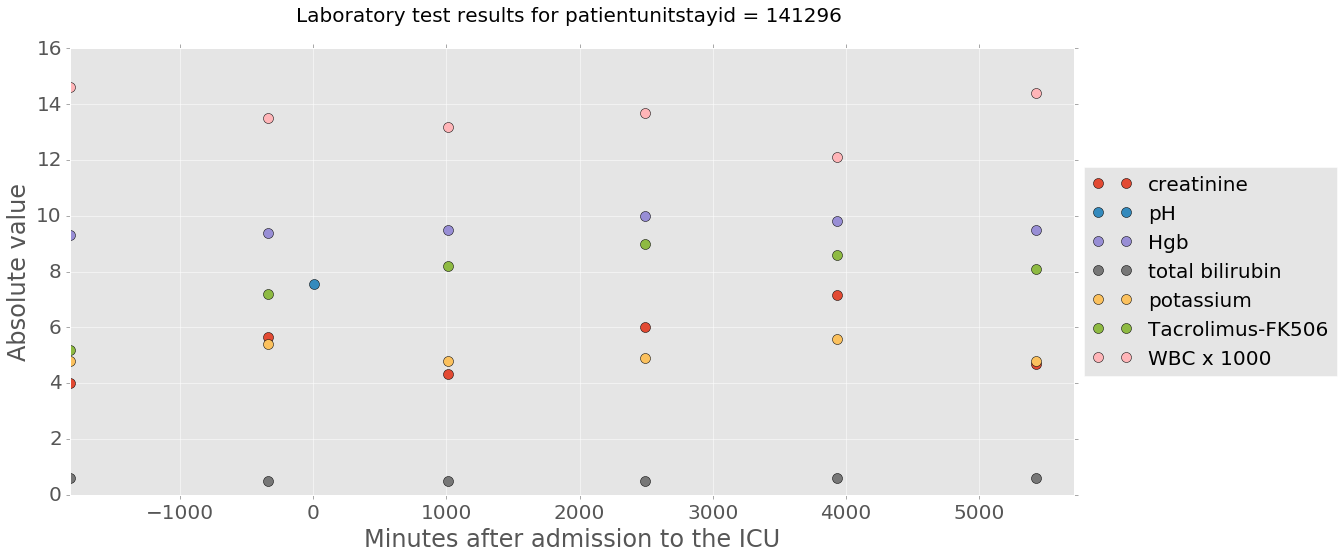

In [35]:
# plot the data
figsize = (18,8)
title = 'Laboratory test results for patientunitstayid = {} \n'.format(patientunitstayid)
ax = lab[labs_to_plot].plot(title=title, figsize=figsize, fontsize=fontsize, marker='o',ms=10, lw=0)

ax.title.set_size(fontsize)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Minutes after admission to the ICU")
ax.set_ylabel("Absolute value")